In [2]:
import os
import warnings
import numpy as np
import xarray as xr
import proplot as pplt
pplt.rc['figure.dpi'] = 100
warnings.filterwarnings('ignore')

In [3]:
FILEDIR = '/global/cfs/cdirs/m4334/sferrett/monsoon-kernels/data/splits'

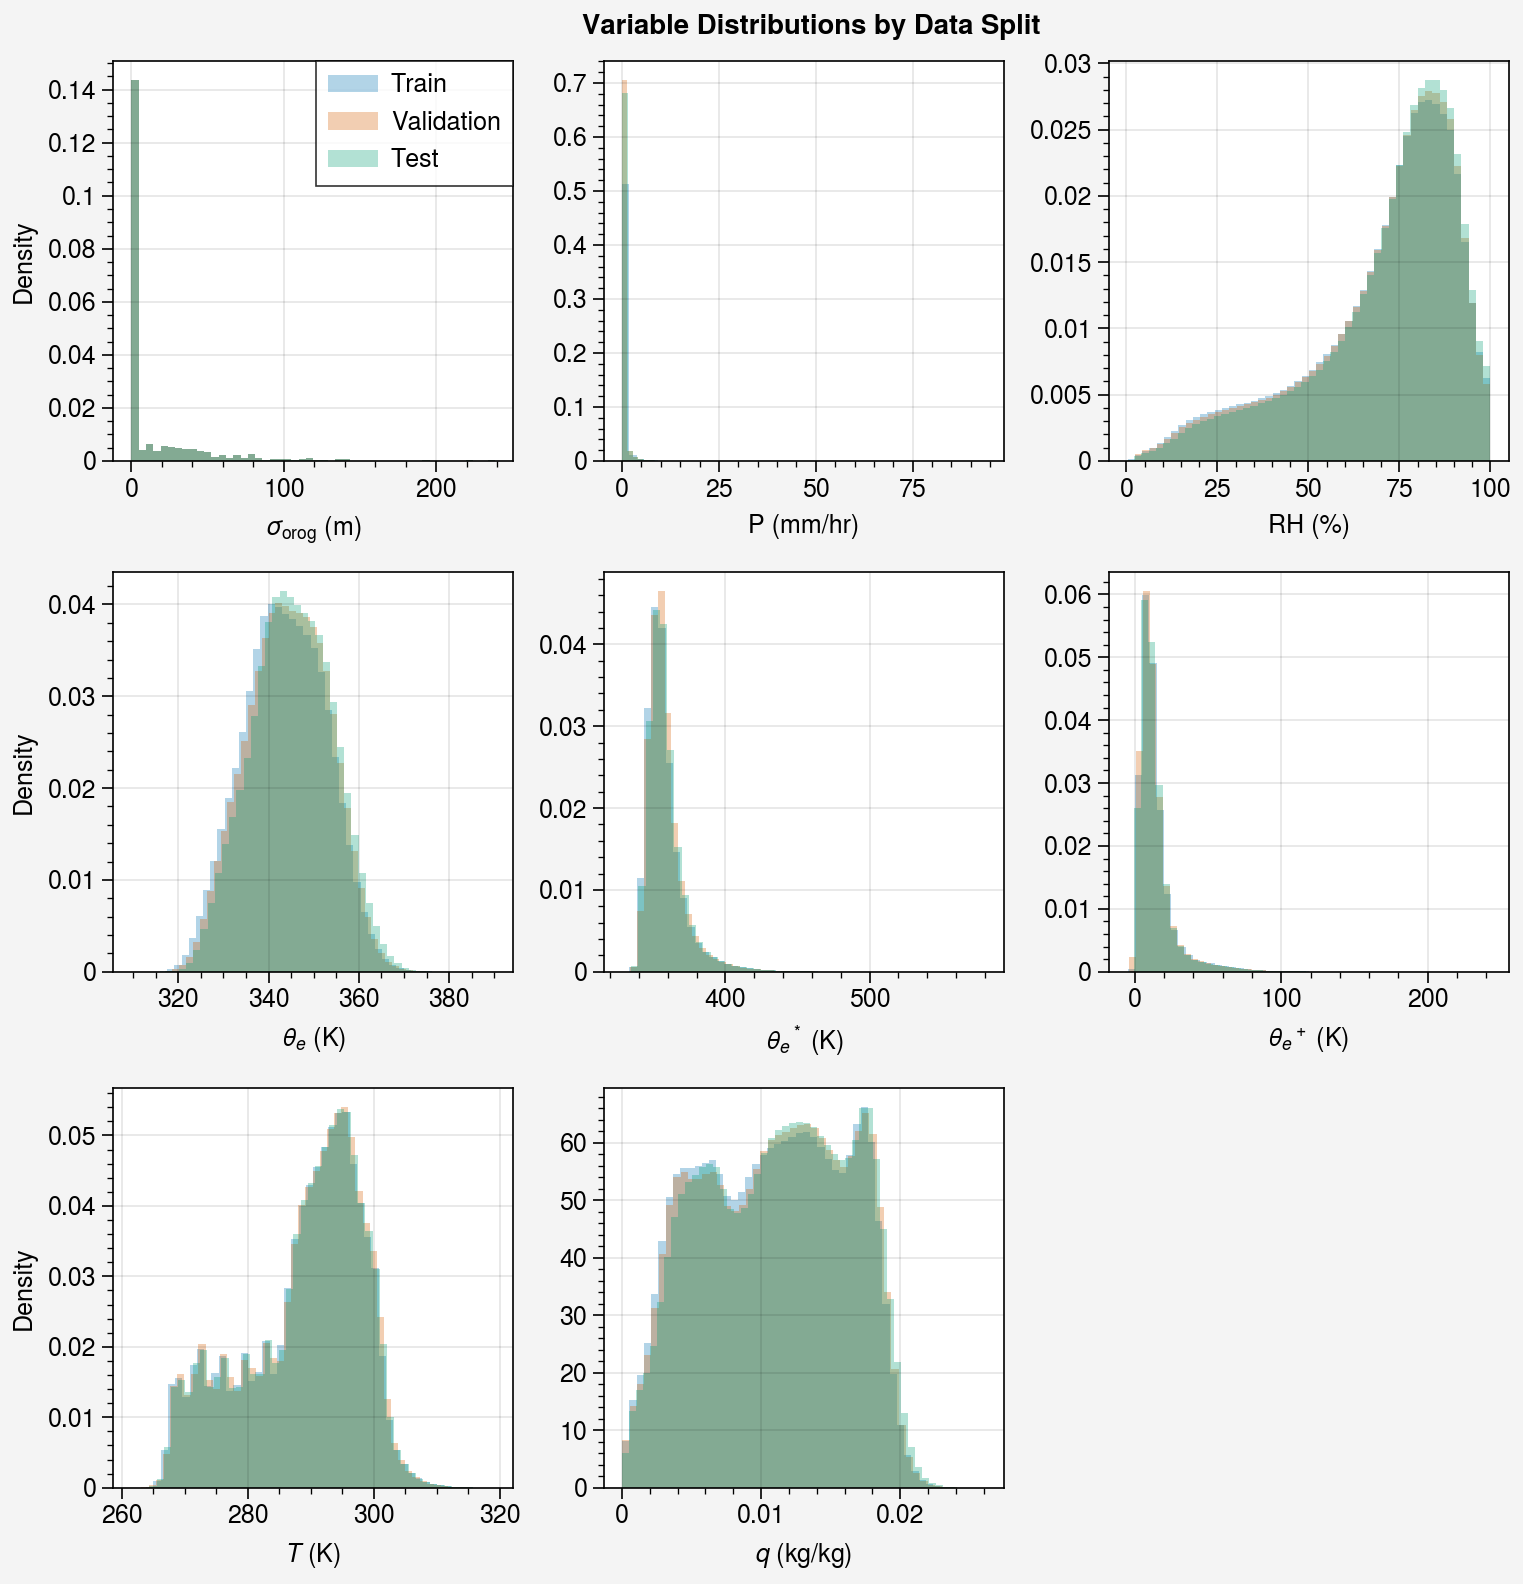

In [4]:
splits = {
    'Train':xr.open_dataset(f'{FILEDIR}/train.h5',engine='h5netcdf'),
    'Validation':xr.open_dataset(f'{FILEDIR}/valid.h5',engine='h5netcdf'),
    'Test':xr.open_dataset(f'{FILEDIR}/test.h5',engine='h5netcdf')}

labels  = {
    'sdo':'$\\mathit{\\sigma}_{orog}$ (m)',
    'pr':'P (mm/hr)',
    'rh':'RH (%)',
    'thetae':'$\\mathit{\\theta_{e}}$ (K)',
    'thetaestar':'$\\mathit{\\theta_{e}}^*$ (K)',
    'thetaeplus':'$\\mathit{\\theta_{e}}^+$ (K)',
    't':'$\\mathit{T}$ (K)',
    'q':'$\\mathit{q}$ (kg/kg)'}

fig,axs = pplt.subplots(nrows=3,ncols=3,refwidth=2,share=False)
axs.format(suptitle='Variable Distributions by Data Split')
axs[:,0].format(ylabel='Density')
for i,(varname,description) in enumerate(labels.items()):
    for splitname,ds in splits.items():
        values = ds[varname].values.ravel()
        values = values[np.isfinite(values)]
        axs[i].hist(values,bins=50,density=True,alpha=0.3,label=splitname)
        axs[i].format(xlabel=description)
        del values
for ax in axs[len(labels):]:
    ax.remove()
axs[0].legend(loc='ur',ncols=1)
pplt.show()